# Ecommerce Dataset

## Context

This dataset is about Ecommerce Store in Brazil. This dataset consists of 7 sub dataset that contain various features from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

## Task

Create analysis based on several deep dive question and make a model that could predict the category of the customer

## Dataset Info

The dataset split into 7 sub datasets.

The first one is customer_dataset.csv which contains personal information about the customer.

* 'customer_id' : Customer ID,
* 'customer_unique_id' : unique identifier of a customer,
* 'customer_zip_code_prefix' : first five digits of customer zip code,
* 'customer_city' : customer city name, 
* 'customer_state' : customer state.

Second is geolocation_dataset.csv which contains information about cities and states in Brazil.

* 'geolocation_zip_code_prefix' : first 5 digits of zip code, 
* 'geolocation_lat' : latitude, 
* 'geolocation_lng' : longitude,
* 'geolocation_city' : city name, 
* 'geolocation_state : state name'.

Third is order_item_dataset.csv which contains information of item purchased

* 'order_id' : order ID, 
* 'order_item_id' : sequential number of order, 
* 'product_id' : product unique identifier, 
* 'seller_id' : seller ID,
* 'shipping_limit_date' : shipping limit date for handling the order, 
* 'price' : item price, 
* 'freight_value' : freight value.

Fourth is order_payments_dataset.csv which contains information of payments for each order.

* 'order_id' : order ID, 
* 'payment_sequential' : payment with more than one method, 
* 'payment_type' : method of payment,
* 'payment_installments' : number of installment, 
* 'payment_value' : payment value.

Fifth is order_reviews_dataset which contains information of review for each order.

* 'review_id' : review ID, 
* 'order_id' : order ID, 
* 'review_score' : review score from 1-5, 
* 'review_comment_title' : review title,
* 'review_comment_message' : review message, 
* 'review_creation_date' : review date sent to customer,
* 'review_answer_timestamp' : review date answered.

Sixth is orders_dataset which contains information of the order itself.

* 'order_id' : order ID, 
* 'customer_id' : customer ID, 
* 'order_status' : order status (delivered, shipped, etc.), 
* 'order_purchase_timestamp' : order purchase timestamp,
* 'order_approved_at' : order approved date, 
* 'order_delivered_carrier_date' : order delivered to logistic date,
* 'order_delivered_customer_date' : order delivered to customer date, 
* 'order_estimated_delivery_date' : order delivered date.

Seventh is products_dataset which contains the product information itself

* 'product_id' : product ID, 
* 'product_category_name' : product name (Portuguese), 
* 'product_name_lenght' : product name length,
* 'product_description_lenght' : product description length, 
* 'product_photos_qty' : Photo quantity of product, 
* 'product_weight_g' : product weight,
* 'product_length_cm' : product length, 
* 'product_height_cm' : product height, 
* 'product_width_cm' : product width.

Eighth is sellers_dataset.csv which contains information about seller who sold the product.

* 'seller_id' : seller ID,
* 'seller_zip_code_prefix' : first five digits of seller zip code,
* 'seller_city' : seller city name,
* 'seller_state' : seller state name.

Last is product_category_name_translation which contains information about product's name in english.

* 'product_category_name' : product's name (Portuguese), 
* 'product_category_name_english' : product's name (English).

## Import Dataset

In [1]:
### Install modules/packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install imblearn
!pip install geopandas
!pip install geoplot
!pip install sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import geopandas as gpd
import geoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn.metrics import ConfusionMatrixDisplay ,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from lifelines.statistics import logrank_test

## Load Dataset

In [3]:
cust = pd.read_csv('customers_dataset.csv')
cust.names = 'Customer'
cust.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [4]:
geo = pd.read_csv('geolocation_dataset.csv')
geo.names = 'Geolocation'
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [5]:
items = pd.read_csv('order_items_dataset.csv')
items.names = 'Order items'
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [6]:
payments = pd.read_csv('order_payments_dataset.csv')
payments.names = 'Order payments'
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [7]:
reviews = pd.read_csv('order_reviews_dataset.csv')
reviews.names = 'Order reviews'
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [8]:
orders = pd.read_csv('orders_dataset.csv')
orders.names = 'Orders'
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [9]:
prod_trans = pd.read_csv('product_category_name_translation.csv')
prod_trans.names = 'Product translation'
prod_trans.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [10]:
products = pd.read_csv('products_dataset.csv')
products.names = 'Product'
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [11]:
sellers = pd.read_csv('sellers_dataset.csv')
sellers.names = 'Seller'
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

## Check Missing Values

In [12]:
# Check if there are any missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print (df.names, " dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
df = [cust,geo,items,payments,reviews,orders,prod_trans,products,sellers]
for i in df:
    missing_values_table(i)

Customer  dataframe has 5 columns.
There are 0 columns that have missing values.
Geolocation  dataframe has 5 columns.
There are 0 columns that have missing values.
Order items  dataframe has 7 columns.
There are 0 columns that have missing values.
Order payments  dataframe has 5 columns.
There are 0 columns that have missing values.
Order reviews  dataframe has 7 columns.
There are 2 columns that have missing values.
Orders  dataframe has 8 columns.
There are 3 columns that have missing values.
Product translation  dataframe has 2 columns.
There are 0 columns that have missing values.
Product  dataframe has 9 columns.
There are 8 columns that have missing values.
Seller  dataframe has 4 columns.
There are 0 columns that have missing values.


As we can see there are 3 datasets that contain missing values which are orders_reviews, orders_dataset, and product_dataset. Next we will check those 3 datasets to see how big the missing value percentage is

In [14]:
missing_values_table(reviews)

Order reviews  dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


In [15]:
missing_values_table(orders)

Orders  dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


In [16]:
missing_values_table(products)

Product  dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


The missing values of dataset orders_dataset and product_dataset are relatively small so we could just get rid of it. But the order_reviews dataset has so many missing values that we couldn't just remove it. So for now we will fill the missing values with 'No Reviews'

In [17]:
orders.dropna(inplace=True)
products.dropna(inplace=True)
reviews.replace(np.nan,'No Reviews', inplace=True)

## Data Preprocessing

Next we will merge all of dataset into one big dataframe

In [18]:
cust.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
geo.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [20]:
merged_df= pd.merge(cust, orders, on="customer_id")
merged_df= merged_df.merge(reviews, on="order_id")
merged_df= merged_df.merge(items, on="order_id")
merged_df= merged_df.merge(products, on="product_id")
merged_df= merged_df.merge(payments, on="order_id")
merged_df= merged_df.merge(sellers, on='seller_id')
merged_df= merged_df.merge(prod_trans, on='product_category_name')
merged_df.shape

(113193, 40)

Next we will convert date features into datetime format.

In [20]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [21]:
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   zip_code_prefix                113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

## Exploratory Data Analysis

First we will set several deep dive question.
* What state does give the most Sales?
* What product is the most sold?
* What product has the highest rating reviews?
* What is the average spending of each state?
* What is the most sold product on each state?
* What times, days, and month are the orders most occurred?
* What is the average time of delivery?

### What state does give the most customer?

In [21]:
### Create a dataframe that group by customer_state based on Customer count.
df = merged_df.copy()
df_state = df.groupby('customer_state').size().sort_values(ascending=False).reset_index()
df_state.rename(columns={0:'count'},inplace=True)
df_state['sales_coverage_percentage'] = round((df_state['count'].cumsum()/df_state['count'].sum())*100,0)
df_state[df_state['sales_coverage_percentage']<82]

,customer_state,count,sales_coverage_percentage
0,SP,47812,42.0
1,RJ,14566,55.0
2,MG,13216,67.0
3,RS,6310,72.0
4,PR,5790,77.0
5,SC,4143,81.0


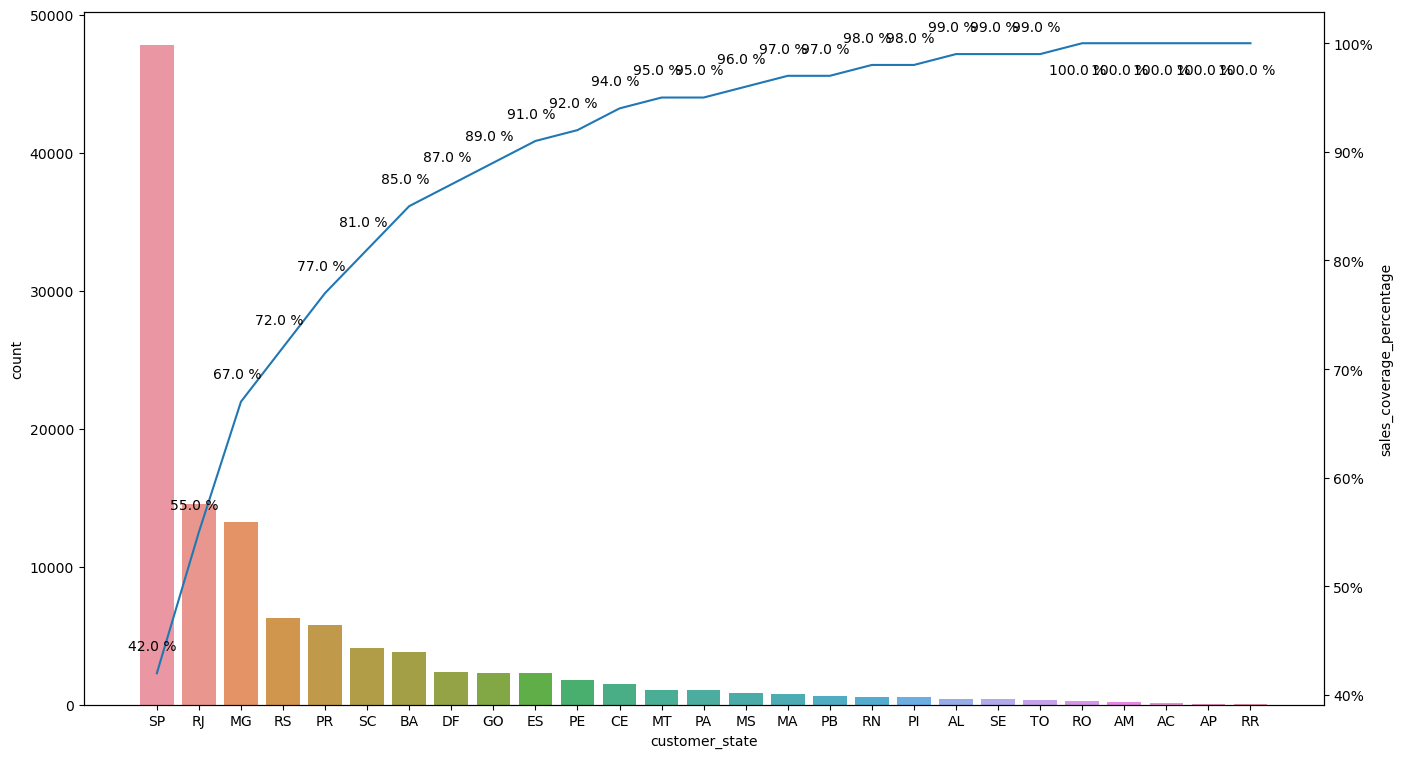

In [23]:
from matplotlib.ticker import PercentFormatter
#create basic bar plot
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.barplot(x = 'customer_state', y = 'count', data = df_state)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'customer_state', y = 'sales_coverage_percentage', data = df_state)
ax2.yaxis.set_major_formatter(PercentFormatter())
for x_val, y_val in zip (range(len(df_state)), df_state['sales_coverage_percentage']):
    text = f"{y_val} %"
    if y_val <= 99:
        ax2.text(x = x_val-0.10, 
                 y = y_val+2.5,
                 s = text,
                 fontsize = 10,
                 color = "black",
                 ha = "center",
                 va = "center"
                )
    else:
        ax2.text(x = x_val-0.10, 
                 y = y_val-2.5,
                 s = text,
                 fontsize = 10,
                 color = "black",
                 ha = "center",
                 va = "center"
                )
    



#display Pareto chart
plt.show()

According to pareto rule. The object that falls below 80% cut off line are 'vital few' factors that affect selling the most. As we can see the state that gives the most customer are:
* SP (Sao Paulo),
* RJ (Rio de Janeiro),
* MG (Minas Gerais),
* RS (Rio Grande do Sul),
* PR (Paraná), 
* SC (Santa Catarina). 

Those states alone contributes to 80% of the customer.

### What product is the most sold?

In [25]:
### Merge order_items_dataset.csv with products_dataset.csv
item_merged = pd.merge(items, products, on='product_id')
item_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [26]:
### Merged with translation name so we can show the product's name in English.
item_merged = item_merged.merge(prod_trans, on='product_category_name')
item_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [27]:
### Make a dataframe that contains info of sold product count for each product.
df_items = item_merged.groupby(['product_category_name_english'])['product_id'].count().sort_values(ascending=False).reset_index()
df_items['percentage_sales_coverage'] = round((df_items['product_id'].cumsum()/df_items['product_id'].sum())*100,0)
df_items.rename(columns={'product_id':'count'}, inplace=True)

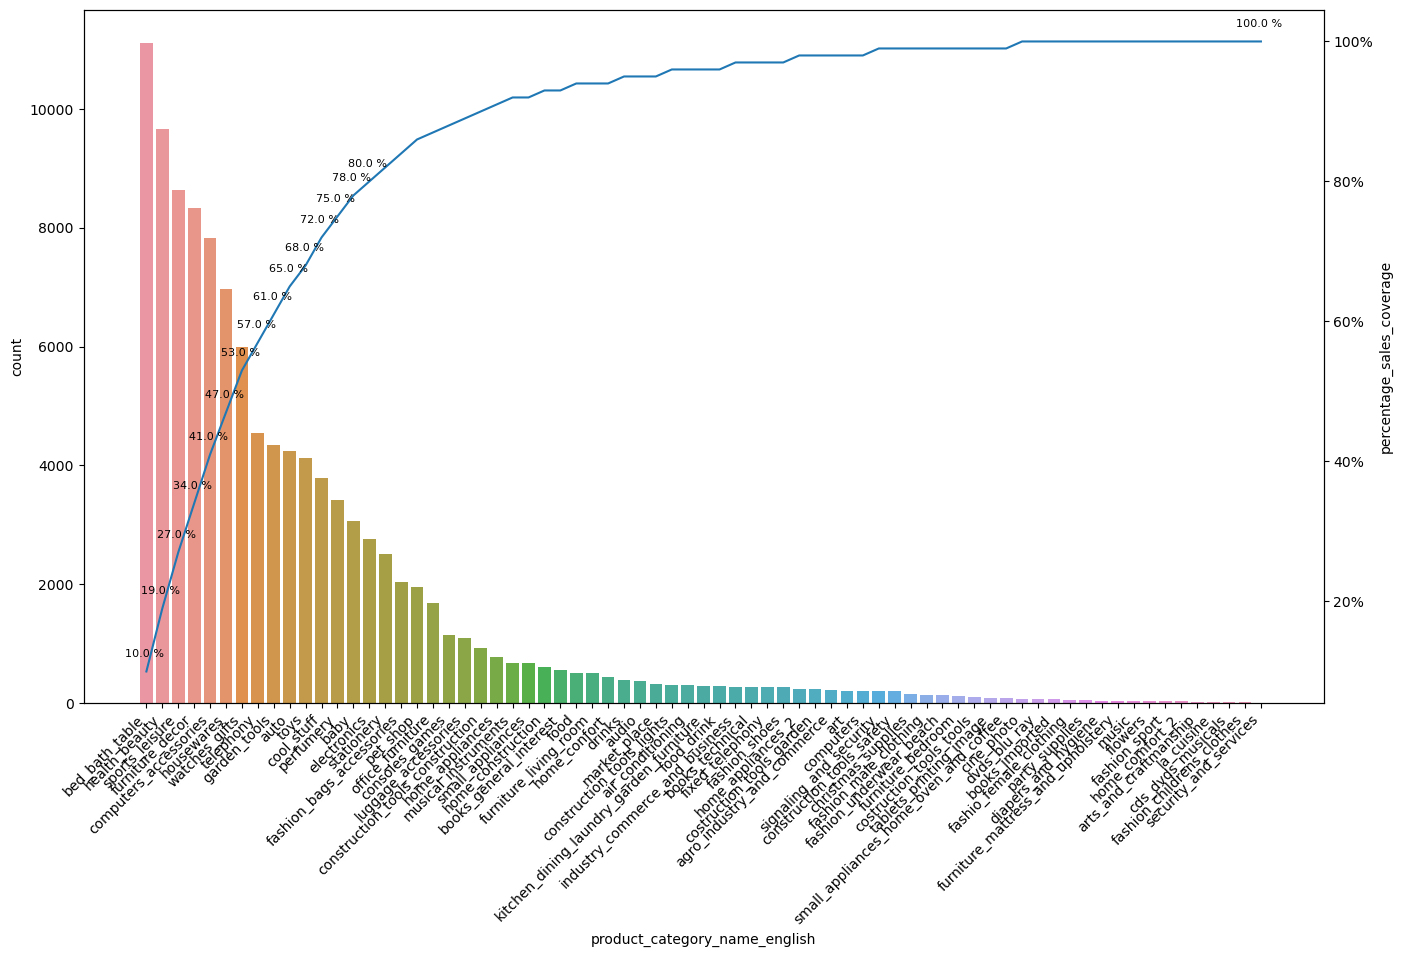

In [28]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(16, 9))
ax=sns.barplot(x='product_category_name_english', y='count', data=df_items)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2=sns.lineplot(x='product_category_name_english', y='percentage_sales_coverage', data=df_items)
ax2.yaxis.set_major_formatter(PercentFormatter())
for x_val, y_val in zip(range(len(df_items)), df_items['percentage_sales_coverage']):
    text = f"{y_val} %"
    if y_val <= 80:
        ax2.text(x = x_val-0.10, 
                 y = y_val+2.5,
                 s = text,
                 fontsize = 8,
                 color = "black",
                 ha = "center",
                 va = "center"
                )
    elif x_val == 70:
        ax2.text(x = x_val-0.10, 
                 y = y_val+2.5,
                 s = text,
                 fontsize = 8,
                 color = "black",
                 ha = "center",
                 va = "center"
                )
    else:
        pass



#display Pareto chart

plt.show()

7 of 71 products sold already cover over than 50% of the sales. Those 7 products are:
* Bed Bath Table, 
* Health Beauty, 
* Sports Leisure,
* Furniture Decor,
* Computers Accessories,
* Housewares,
* Watches_gifts.

### What product has the highest rating review?

In [32]:
### Make a dataframe which calculate the count of review for each.
df_reviews = merged_df.groupby(['review_score']).size().sort_values(ascending=False).reset_index()
df_reviews.rename(columns={0:'count'}, inplace=True)
df_reviews

,review_score,count
0,5,65145
1,4,21811
2,1,12865
3,3,9533
4,2,3839


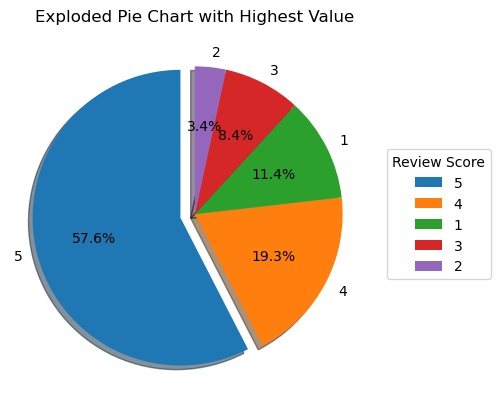

In [33]:
### Create a pie chart that shows the percentage of each review
# Explode the slice with the highest value
explode = (0.1, 0.0, 0.0, 0.0, 0.0)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(df_reviews['count'], labels=df_reviews['review_score'], explode=explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.legend(df_reviews['review_score'],
          title ="Review Score",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

# Add a title
ax.set_title('Exploded Pie Chart with Highest Value')

# Show the chart
plt.show()

Most of the products have good reviews where 5 star around 57.6% and 4 star around 19.3%. The bad reviews percentage are quite low with 3 star, 2 star, and 1 star respectively around 8.4%, 3.4%, and 11.4%

#### Calculate top 5 product for each review score

In [34]:
df_review_item = merged_df.groupby(['review_score','product_category_name']).size().sort_values(ascending=False).reset_index()
df_review_item[df_review_item['review_score'] == 5].head()

,review_score,product_category_name,0
0,5,cama_mesa_banho,6149
1,5,beleza_saude,6011
2,5,esporte_lazer,5261
3,5,moveis_decoracao,4680
4,5,informatica_acessorios,4334


In [35]:
df_review_item[df_review_item['review_score'] == 4].head()

,review_score,product_category_name,0
13,4,cama_mesa_banho,2211
15,4,beleza_saude,1758
16,4,esporte_lazer,1688
19,4,informatica_acessorios,1575
20,4,moveis_decoracao,1566


In [36]:
df_review_item[df_review_item['review_score'] == 3].head()

,review_score,product_category_name,0
27,3,cama_mesa_banho,1143
35,3,moveis_decoracao,766
36,3,beleza_saude,755
41,3,informatica_acessorios,678
43,3,esporte_lazer,649


In [37]:
df_review_item[df_review_item['review_score'] == 2].head()

,review_score,product_category_name,0
48,2,cama_mesa_banho,548
65,2,moveis_decoracao,370
77,2,informatica_acessorios,273
81,2,utilidades_domesticas,254
84,2,beleza_saude,235


In [38]:
df_review_item[df_review_item['review_score'] == 1].head()

,review_score,product_category_name,0
17,1,cama_mesa_banho,1633
25,1,moveis_decoracao,1172
28,1,informatica_acessorios,1066
30,1,beleza_saude,990
31,1,esporte_lazer,907


As we can see the top 5 of each review score doesn't change at all. Probably because the quantity of those products are quite high compared to the others so we can't conclude anything from this analysis

### What is the average spending of each state?

In [39]:
# brazilian map plot function
def brazil_map(df, colormap, cb_label):
    # get geographical shape data
    brazil = gpd.read_file('BRA_adm1.shp')[['HASC_1','geometry']]
    brazil['HASC_1'] = [x[3:] for x in brazil['HASC_1']]
    # merge both datasets on country names
    data_merge = brazil.merge(df, left_on= 'HASC_1', right_on='state')
    brazil['coords'] = brazil['geometry'].apply(lambda x: x.representative_point().coords[:])
    brazil['coords'] = [coords[0] for coords in brazil['coords']]
    # plot the base map with black lines
    base = brazil.plot(figsize=(10, 8), color='white', edgecolor='black', lw= 1, alpha=0.5)
    bbox_props = dict(boxstyle='round,pad=0.25', fc='white', ec='black')
    for idx, row in brazil.iterrows():
        base.text(s=row['HASC_1'], x=row['coords'][0]-1, y=row['coords'][1], horizontalalignment='center', bbox = bbox_props, fontsize=10)
    
    divider = make_axes_locatable(base)
    cax = divider.append_axes("right", size="2%", pad=0.1)
       
    # make the heatmap on top of base map
    data_merge.plot(ax=base, column= df.columns[-1], legend= True, cmap=colormap, cax= cax, legend_kwds= {'label': cb_label})
    base.axis('off')
    plt.savefig(cb_label + '.png', dpi=300)

In [41]:
# Create a dataframe that contains mean payment value for each state
customer_regions = merged_df.groupby('customer_state').agg({'payment_value':'mean', 'customer_unique_id':'count'})
customer_regions.reset_index(inplace=True)

,customer_state,payment_value,customer_unique_id
0,AC,269.164674,92
1,AL,243.092215,438
2,AM,198.882335,167
3,AP,261.601585,82
4,BA,197.499586,3844
5,CE,221.175662,1480
6,DF,174.772653,2397
7,ES,169.090692,2268
8,GO,190.519119,2305
9,MA,238.673222,807


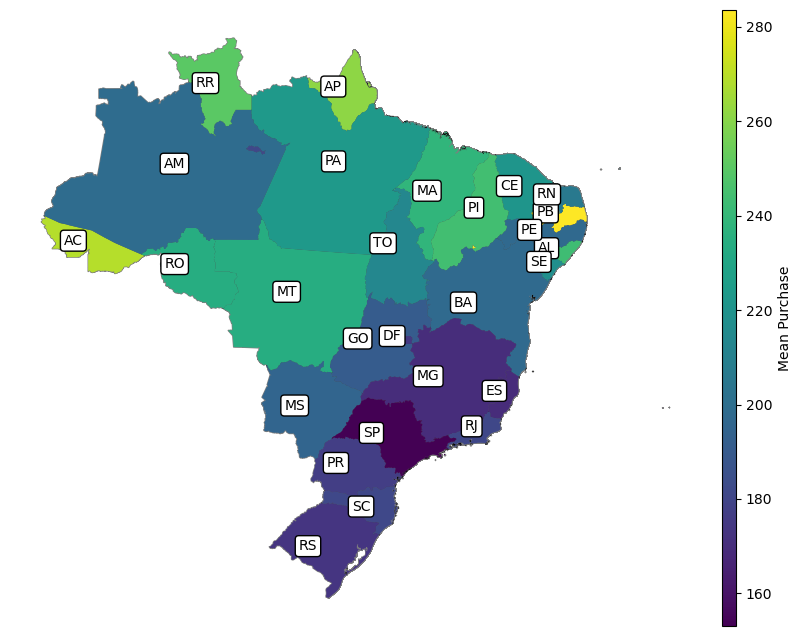

In [42]:
# make brazilian heatmap
brazil_map(customer_regions[['customer_state', 'payment_value']], 'viridis', 'Mean Purchase')

Paraiba has the highest average spending value, Sao Paulo on the other hand lies on the other end of the same spectrum.

### What is the most sold product on each state?

In [29]:
# groupby columns with each state and product category name
state_product_df = merged_df.groupby(['customer_state', 'product_category_name_english']).agg({'order_id': 'count'}).sort_values(by='order_id',ascending=False).reset_index()
state_product_df = state_product_df.drop_duplicates(['customer_state']).reset_index(drop=True)
state_product_df.rename(columns={'order_id':'count'},inplace=True)

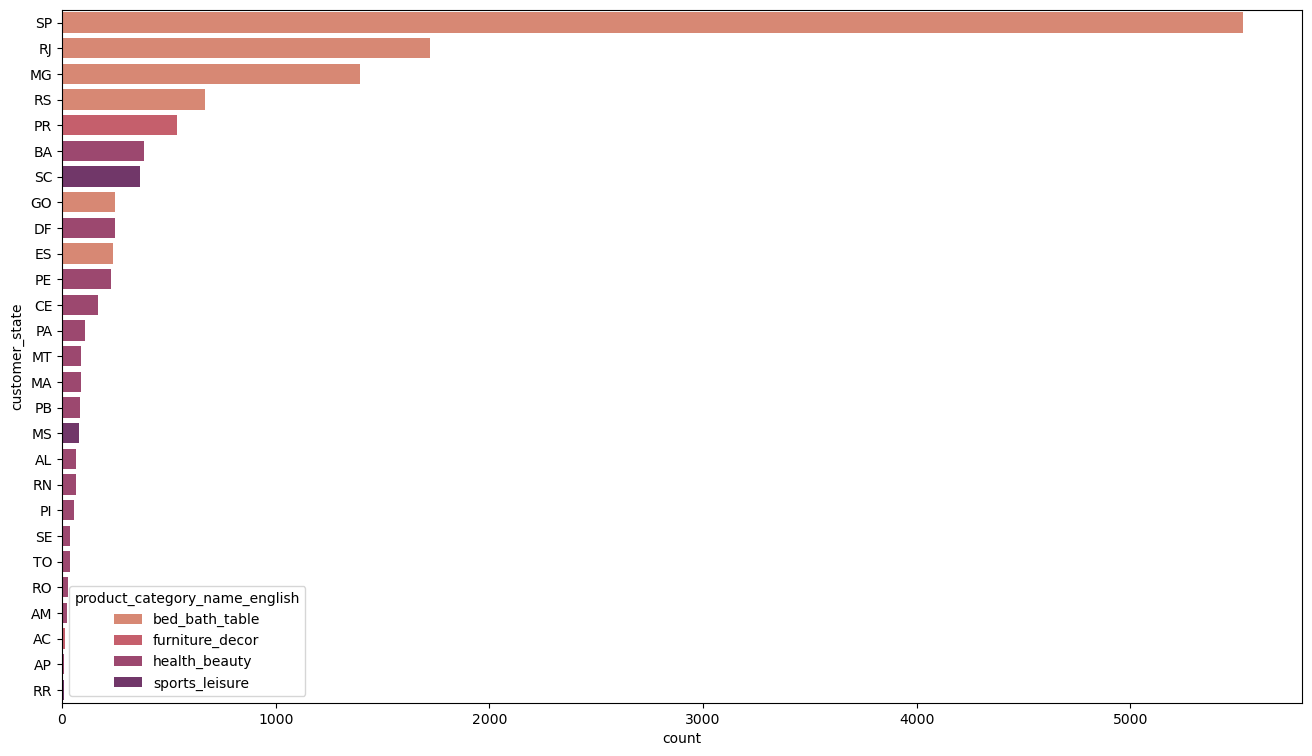

In [187]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(16, 9))
ax=sns.barplot(x='count', y='customer_state', hue='product_category_name_english', 
               data=state_product_df, dodge=False, palette='flare')

plt.show()

As we can see the most sold furnitures across each state are bed bath table, furniture decor, health beauty, and sports leisure. Bed bath table dominate the sales on top 5 states which are SP, RJ, MG, RS, and PR.

### What times, and days are the orders most occurred?

To answer this question. We will look into order dataset and see the times and days most orders occurred.

In [45]:
### Extract hour, weekday, and day from order purchase timestamp
merged_df['hour'] = merged_df['order_purchase_timestamp'].dt.hour
merged_df['dayoftheweek'] = merged_df['order_purchase_timestamp'].dt.weekday
merged_df['days'] = merged_df['order_purchase_timestamp'].dt.day
merged_df

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,hour,dayoftheweek,days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture,15,1,16
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,0,3,9
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture,0,3,9
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture,20,6,7
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture,19,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,2017-05-27 14:03:20,2017-05-27 14:15:16,2017-05-29 09:30:43,...,credit_card,10,232.19,89701,concordia,SC,la_cuisine,14,5,27
113189,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,...,credit_card,8,426.70,89701,concordia,SC,la_cuisine,19,5,31
113190,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,credit_card,3,160.46,89701,concordia,SC,la_cuisine,9,0,28
113191,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,credit_card,2,55.18,89701,concordia,SC,la_cuisine,18,0,31


In [46]:
### Create helper function
def groupbyfunc(df,column):
    if column == 'dayoftheweek':
        df_group = df.groupby([column])['order_id'].count().reset_index()
        df_group.rename(columns={'order_id':'count'},inplace=True)
        df_group[column] = df_group['dayoftheweek'].map({0:'Monday',
                                                       1:'Tuesday',
                                                       2:'Wednesday',
                                                       3:'Thursday',
                                                       4:'Friday',
                                                       5:'Saturday',
                                                       6:'Sunday'
                                                      }
                                                     )
        fig, ax = plt.subplots(figsize=(16, 9))
        ax=sns.lineplot(x=column, y='count', data=df_group)
        plt.show()
    else:
        df_group = df.groupby([column])['order_id'].count().reset_index()
        df_group.rename(columns={'order_id':'count'},inplace=True)
        fig, ax = plt.subplots(figsize=(16, 9))
        ax=sns.lineplot(x=column, y='count', data=df_group)
        plt.show()
    

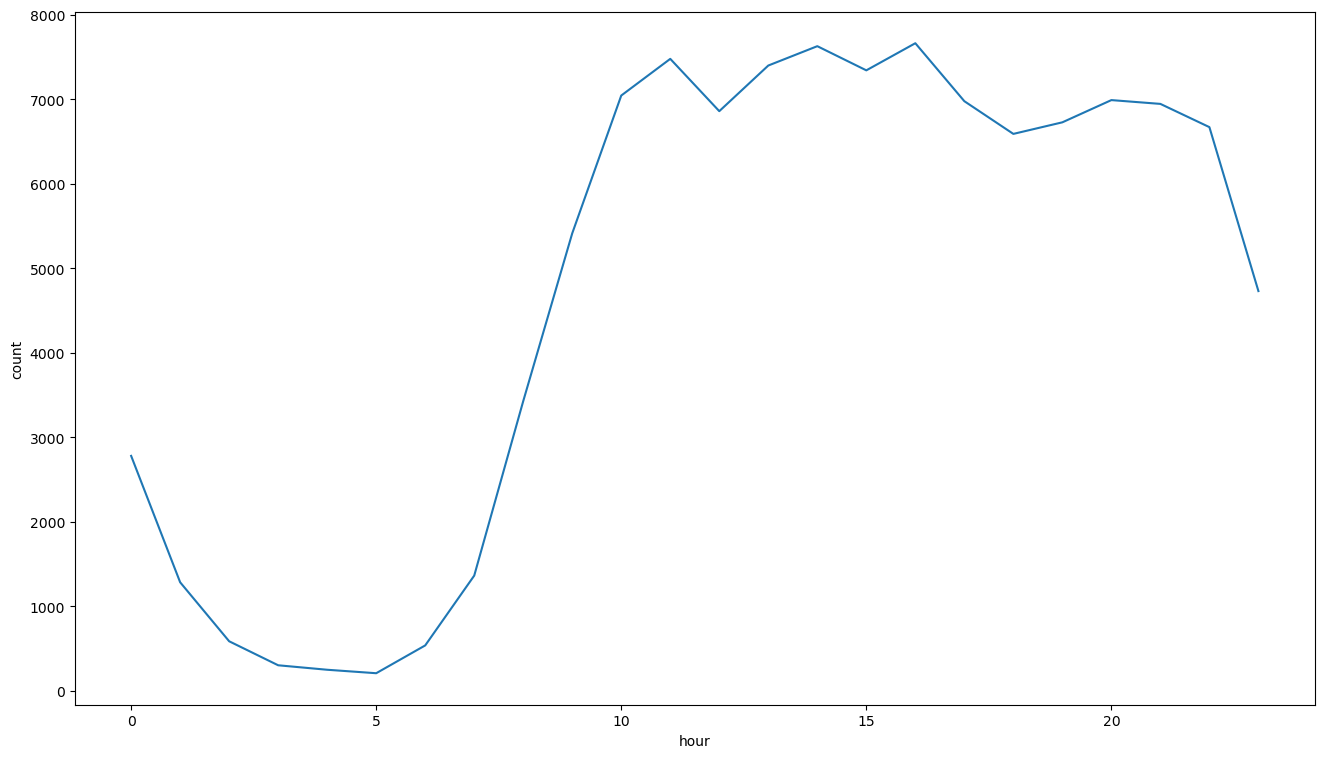

In [47]:
groupbyfunc(merged_df,'hour')

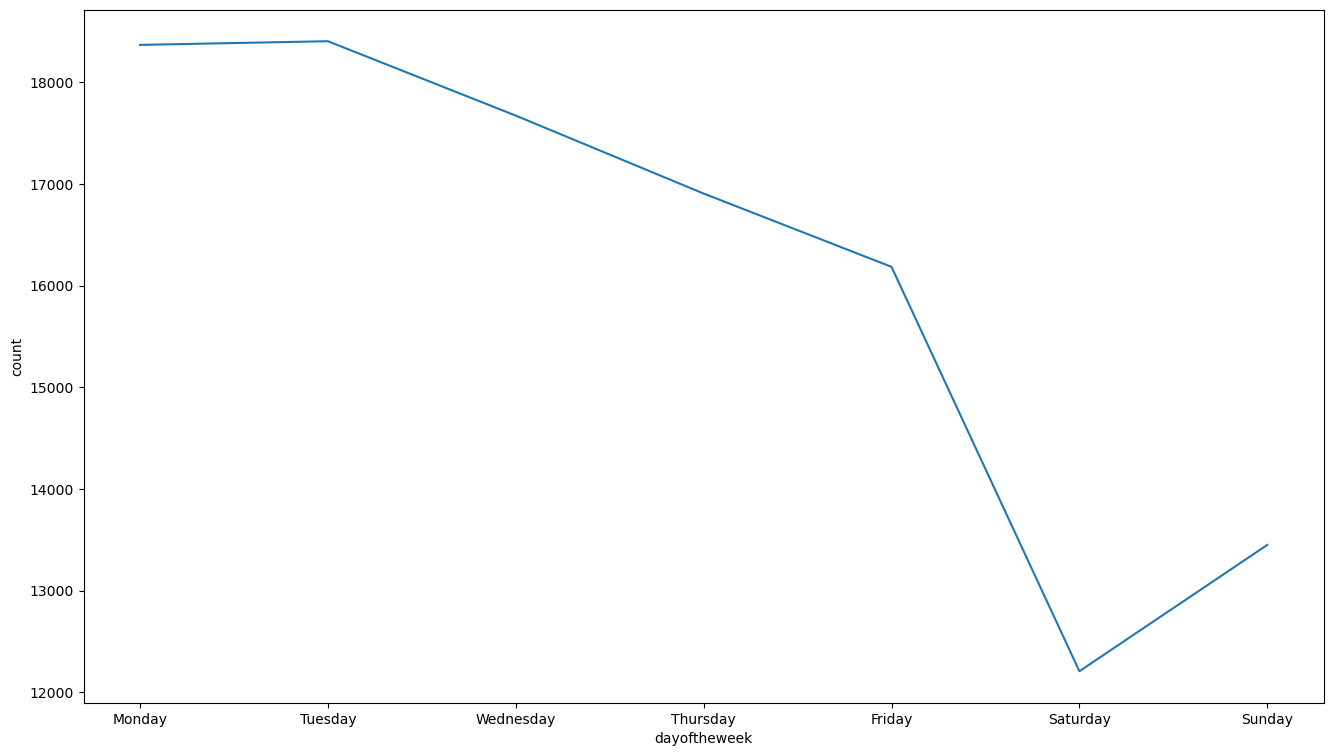

In [48]:
groupbyfunc(merged_df,'dayoftheweek')

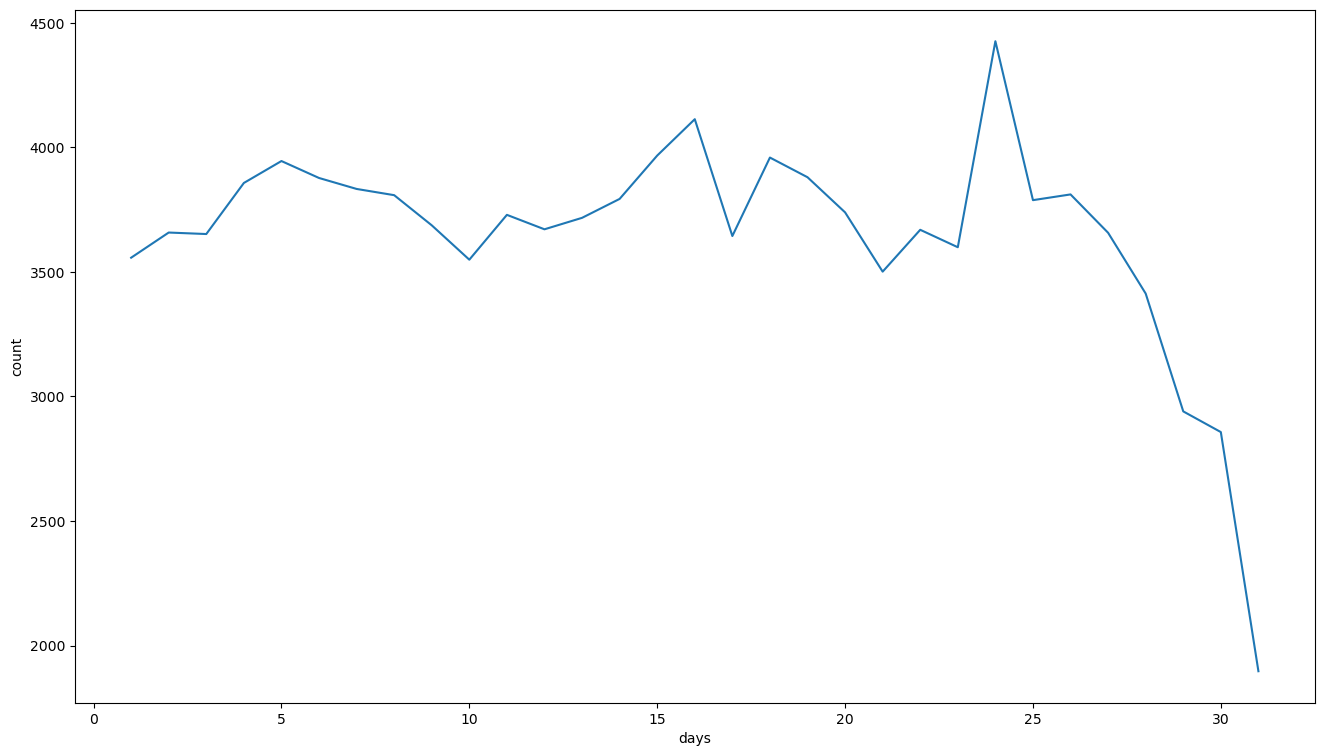

In [49]:
groupbyfunc(merged_df,'days')

There are several times that has the highest order activity record. In terms of hours, the peak hours are around 10 AM - 3 PM and around 8 PM. In terms of day of the week, the order activity is declining from the highest peak which is monday all the way down until saturday which is the lowest activity recorded. In terms of days, There are several peaks which is around 5th, 15th, and 25th of the month.

### What is the average time of delivery?

In [51]:
### Calculate real delivery time
delivery_time = merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']
### Calculate estimated delivery time
est_delivery_time = merged_df['order_estimated_delivery_date'] - merged_df['order_purchase_timestamp']
### Calculate the difference between real and estimated delivery time
est_real_delivery_time = est_delivery_time - delivery_time

In [52]:
cats = [delivery_time,est_delivery_time,est_real_delivery_time]

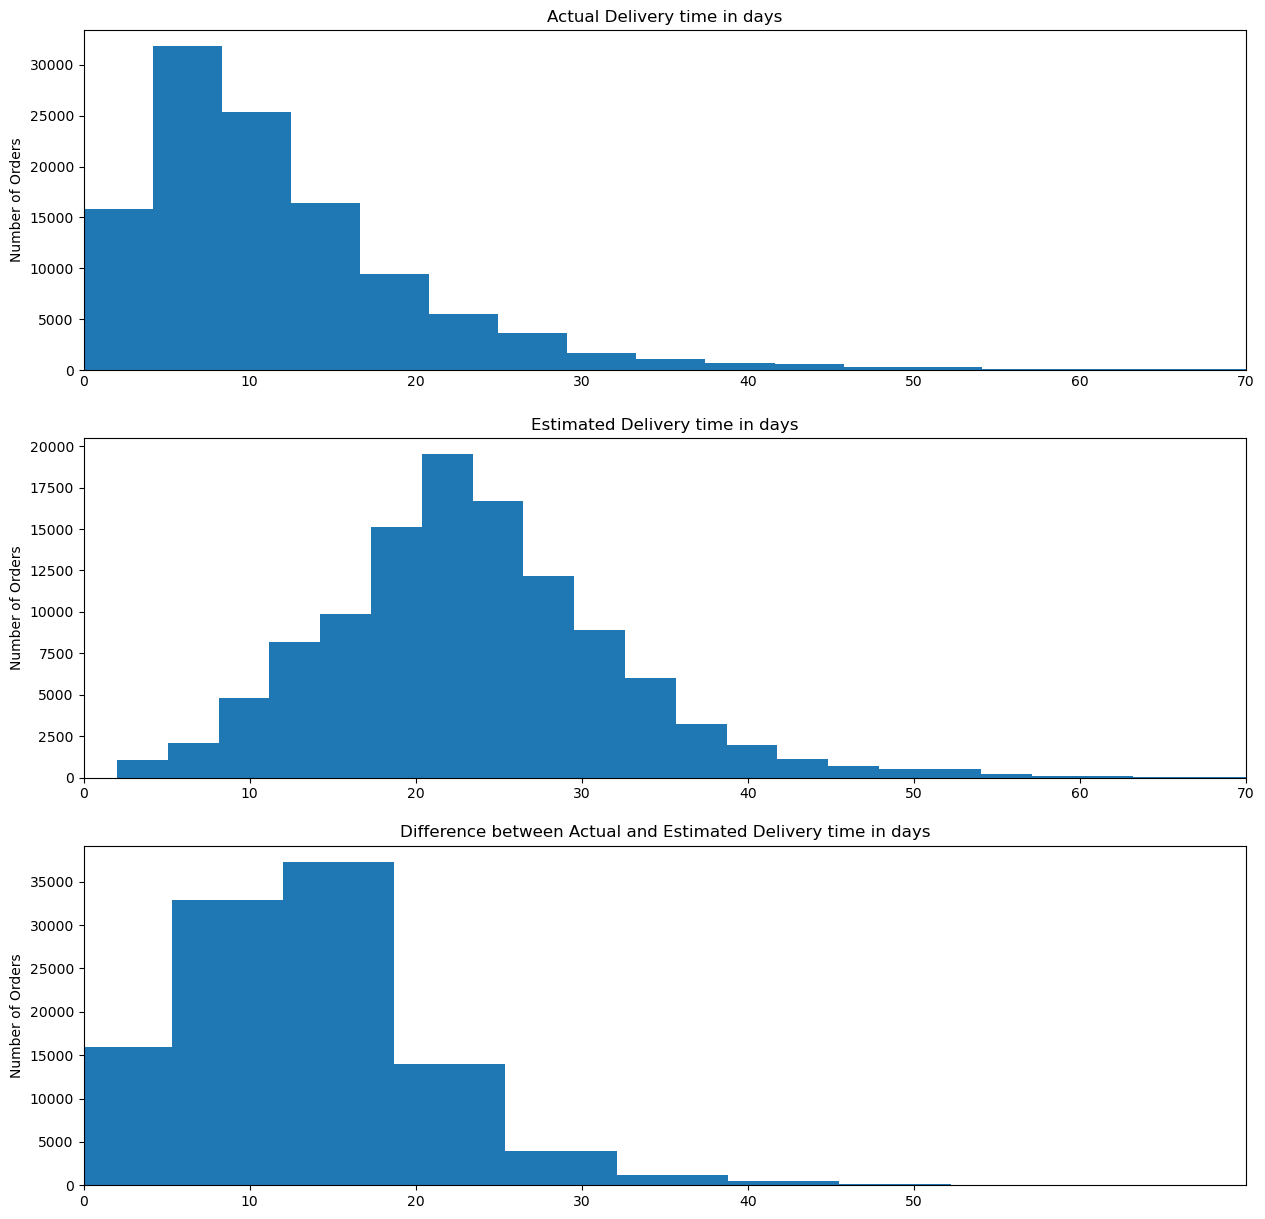

In [53]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))
xlim = (0,70)
for i,j in zip(range(0,3),cats):
    ax[i].hist(j.astype('timedelta64[D]'), bins = 50)
    if i == 0:
        ax[i].set_title('Actual Delivery time in days')
    elif i == 1:
        ax[i].set_title('Estimated Delivery time in days')
    else:
        ax[i].set_title('Difference between Actual and Estimated Delivery time in days')
    ax[i].set_ylabel('Number of Orders')
    ax[i].set_xlim(xlim)
    

xticks = [0, 10, 20, 30, 40, 50, 60]
ax[0].tick_params(axis="x", which="both", length=0.)
ax[2].set_xticks(range(0, 60, 10))
    
plt.show()

From the figure above we could see that The average delivery time is 10 days while the average estimated delivery time is around 20 days. It means the courier had exceeded the expectation of estimated delivery time and could do their job better than expected.

### RFM Analysis

The “RFM” in RFM analysis stands for recency, frequency and monetary value. RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. An RFM model is built using three key factors:

how recently a customer has transacted with a brand how frequently they’ve engaged with a brand how much money they’ve spent on a brand’s products and services a basic CRM system can perform rudimentary tracking of the three easily quantifiable characteristics that contribute to RFM analysis:

Recency value: This refers to the amount of time since a customer’s last interaction with a brand, which can include their last purchase, a visit to a website, use of a mobile app, a “like” on social media and more. Recency is a key metric because customers who have interacted with your brand more recently are more likely to respond to new marketing efforts.

Frequency value: This refers to the number of times a customer has made a purchase or otherwise interacted with your brand during a particular period of time. Frequency is a key metric because it shows how deeply a customer is engaged with your brand. Greater frequency indicates a higher degree of customer loyalty.

Monetary value: This refers to the total amount a customer has spent purchasing products and services from your brand over a particular period of time. Monetary value is a key metric because the customers who have spent the most in the past are more likely to spend more in the future.

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   zip_code_prefix                113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

In [55]:
### Determine the date taken 1 day after the last order purchase timestamp
date_taken = merged_df['order_purchase_timestamp'].max()+dt.timedelta(days=1)
### Create RFM dataframe
rfm_df = df.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (date_taken - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)
rfm_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,4134.84
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69


In [56]:
# Create quartiles
quantiles = rfm_df.quantile(q=[0.2,0.4,0.6,0.8]).reset_index()
quantiles

,index,Recency,Frequency,Monetary
0,0.2,91.0,1.0,56.01
1,0.4,176.0,1.0,89.67
2,0.6,268.0,1.0,139.98
3,0.8,381.0,1.0,238.32


In [57]:
quantiles['Recency'][0]

91.0

In [58]:
def r_score(x,quantile,col):
    for i in range(0,len(df)):
        if x <= quantile[col][0]:
            return 5
        elif x > quantile[col][0] and x <= quantile[col][1]:
            return 4
        elif x > quantile[col][1] and x <= quantile[col][2]:
            return 3
        elif x > quantile[col][2] and x <= quantile[col][3]:
            return 2
        else:
            return 1

In [59]:
def fm_score(x,quantile,col):
    for i in range(0,len(df)):
        if x > quantile[col][3]:
            return 5
        elif x <= quantile[col][3] and x > quantile[col][2]:
            return 4
        elif x <= quantile[col][2] and x > quantile[col][1]:
            return 3
        elif x <= quantile[col][1] and x > quantile[col][0]:
            return 2
        else:
            return 1

In [60]:
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score(x,quantiles,'Recency'))
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: fm_score(x,quantiles, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_score(x,quantiles, 'Monetary'))
rfm_df['RFM Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,4134.84,1,5,5,155
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,1,2,312
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3,113
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,1,3,413


After we calculate the RFM score. The next step is to clustering this score into several categories.

In [61]:
seg_map = {
    r'[1-2][1-2]': 'inactive',
    r'[1-2][3-5]': 'at_Risk',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'[3-5][1-2]': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm_df['Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,new_customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,new_customers
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,inactive
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,inactive
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,inactive
...,...,...,...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,4134.84,1,5,5,155,at_Risk
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,1,2,312,new_customers
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3,113,inactive
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,1,3,413,new_customers


In [62]:
rfm_df[rfm_df['Segment'] == 'champions']

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
19,000e309254ab1fc5ba99dd469d36bdb4,66,2,78.42,5,5,2,552,champions
22,000fbf0473c10fc1ab6f8d2d286ce20c,35,4,1449.52,5,5,5,555,champions
32,0015752e079902b12cd00b9b7596276b,27,2,149.64,5,5,4,554,champions
36,001928b561575b2821c92254a2327d06,5,2,329.62,5,5,5,555,champions
52,0025795df7a7d077c4c90162fa820085,37,2,428.16,5,5,5,555,champions
...,...,...,...,...,...,...,...,...,...
91366,ffb52634b4c16223ff808f266332de04,83,2,171.08,5,5,4,554,champions
91419,ffdf771c03dd683f1ed7017ae4e9efb2,32,2,100.76,5,5,3,553,champions
91434,ffe96201d466b0e0dc8139850be29d5d,44,2,192.84,5,5,4,554,champions
91450,fff22793223fe80c97a8fd02ac5c6295,65,3,267.57,5,5,5,555,champions


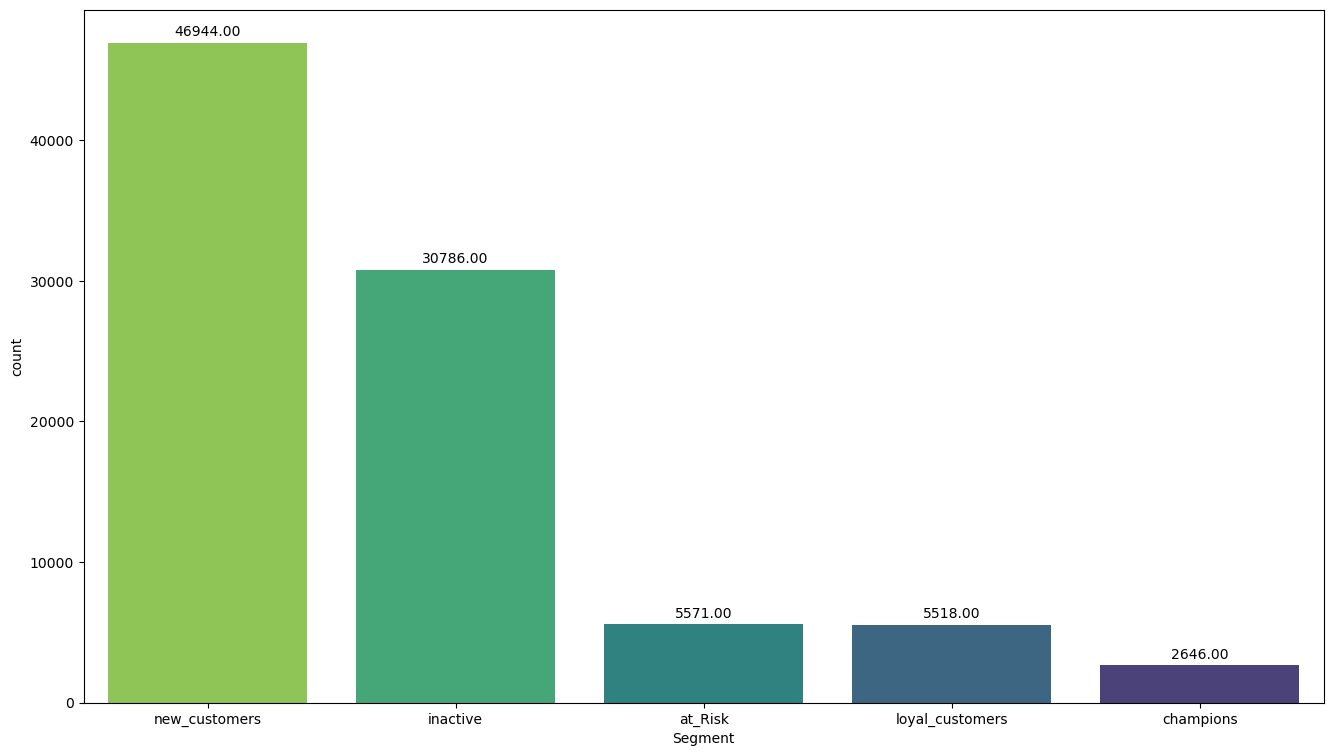

In [63]:
df_segment = rfm_df.groupby(['Segment'])['customer_unique_id'].count().sort_values(ascending=False).reset_index()
df_segment['percentage'] = round((df_segment['customer_unique_id']/df_segment['customer_unique_id'].sum())*100,0)
df_segment.rename(columns={'customer_unique_id':'count'}, inplace=True)

fig, ax = plt.subplots(figsize=(16, 9))
ax=sns.barplot(x='Segment', y='count', data=df_segment, palette='viridis_r')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

As we can see there are several cluster made for the customer. 
* The first one is new_customer which categorize customers who recently made a purchase but the frequency is still quite low.
* The second one is inactive which categorize customers who haven't made a purchase in a long time and are considered inactive.
* The third one is at_Risk. There are customers who are at risk of becoming inactive or churning.
* The fourth one is loyal customer. This category categorize customers who has high recency and high frequency means they are frequently visiting our store and least likely to go to our rival.
* The last is champion which means they are our loyal customer who spend most money in our store.

In [64]:
df_segment_mean = rfm_df.groupby(['Segment']).agg({'R':'mean',
                                                  'F':'mean',
                                                  'M':'mean'}
                                                 ).reset_index()

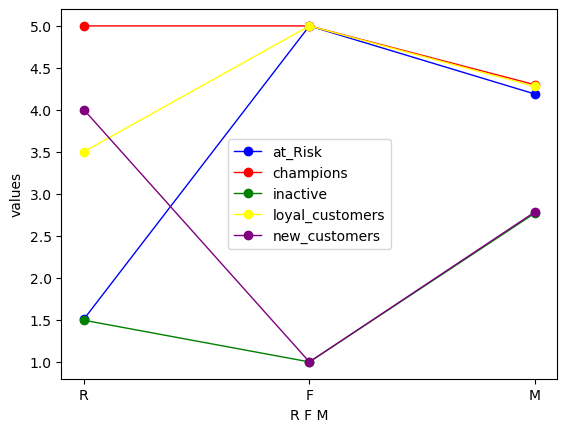

In [65]:
# Visualization using lineplot
x=['R', 'F', 'M']
colors=['blue','red','green','yellow','purple']
for i in range(0,5):
    plt.plot(x,df_segment_mean.iloc[i,1:],label=df_segment_mean['Segment'][i],linewidth=1,color=colors[i],marker='o')
    plt.legend()
plt.xlabel('R F M')
plt.ylabel('values')
plt.show()

Figure above is the mean score of each RFM variable.

### K-means Clustering

First we will check the distribution of RFM values

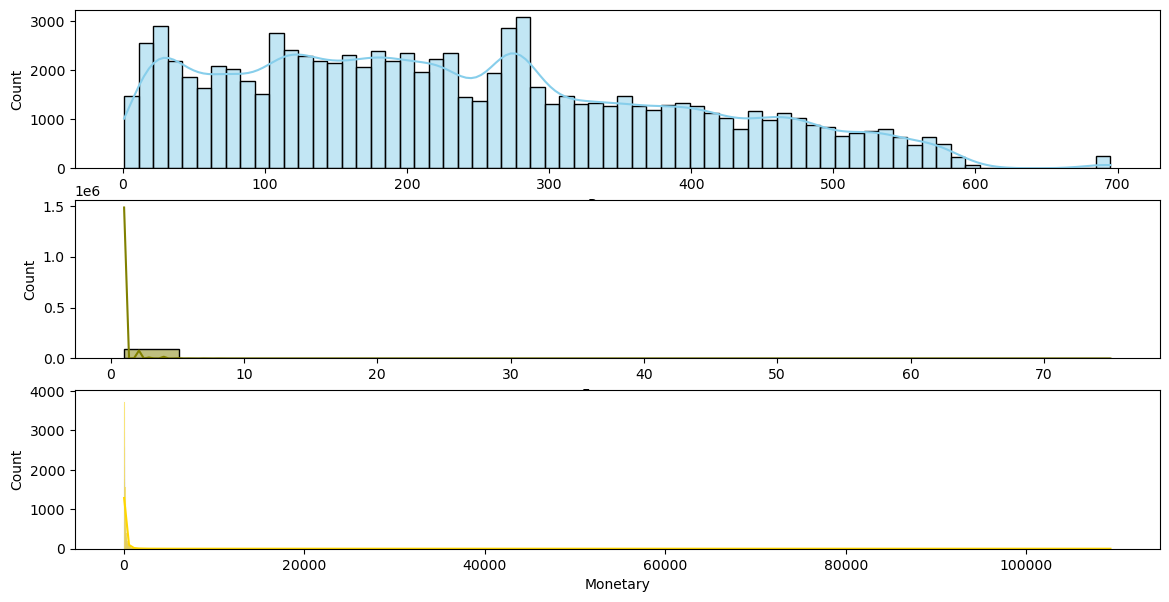

In [66]:
fig, axs = plt.subplots(3, 1, figsize=(14, 7))

sns.histplot(data=rfm_df, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=rfm_df, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=rfm_df, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

The data is quite skewed so we need to do something about it. To handle it we will try to do outlier handling and Standardize the data.

In [67]:
### Handling outlier using IQR
def outlier(column):
  q1 = rfm_df[column].quantile(0.25)
  q3 = rfm_df[column].quantile(0.75)
  iqr = q3 - q1
  return['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                              else 'not outlier' for x in rfm_df[column].values]  

In [68]:
rfm_clean = rfm_df.copy()
cats = ['Recency','Frequency','Monetary']
for i in cats:
    rfm_clean['outlier_R'] = outlier(i)
    rfm_clean['outlier_F'] = outlier(i)
    rfm_clean['outlier_M'] = outlier(i)
    
rfm_clean = rfm_clean[(rfm_clean['outlier_R'] == 'not outlier') & (rfm_clean['outlier_F'] == 'not outlier')
                     & (rfm_clean['outlier_M'] == 'not outlier')]
rfm_clean = rfm_clean[['Recency','Frequency','Monetary']]
rfm_clean

,Recency,Frequency,Monetary
0,112,1,141.90
1,115,1,27.19
2,537,1,86.22
3,321,1,43.62
4,288,1,196.89
...,...,...,...
91459,255,1,73.16
91461,262,1,84.58
91462,568,1,112.46
91463,119,1,133.69


We successfully remove the outlier. Now we will transform the data using StandardScaler

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_clean)

<AxesSubplot: >

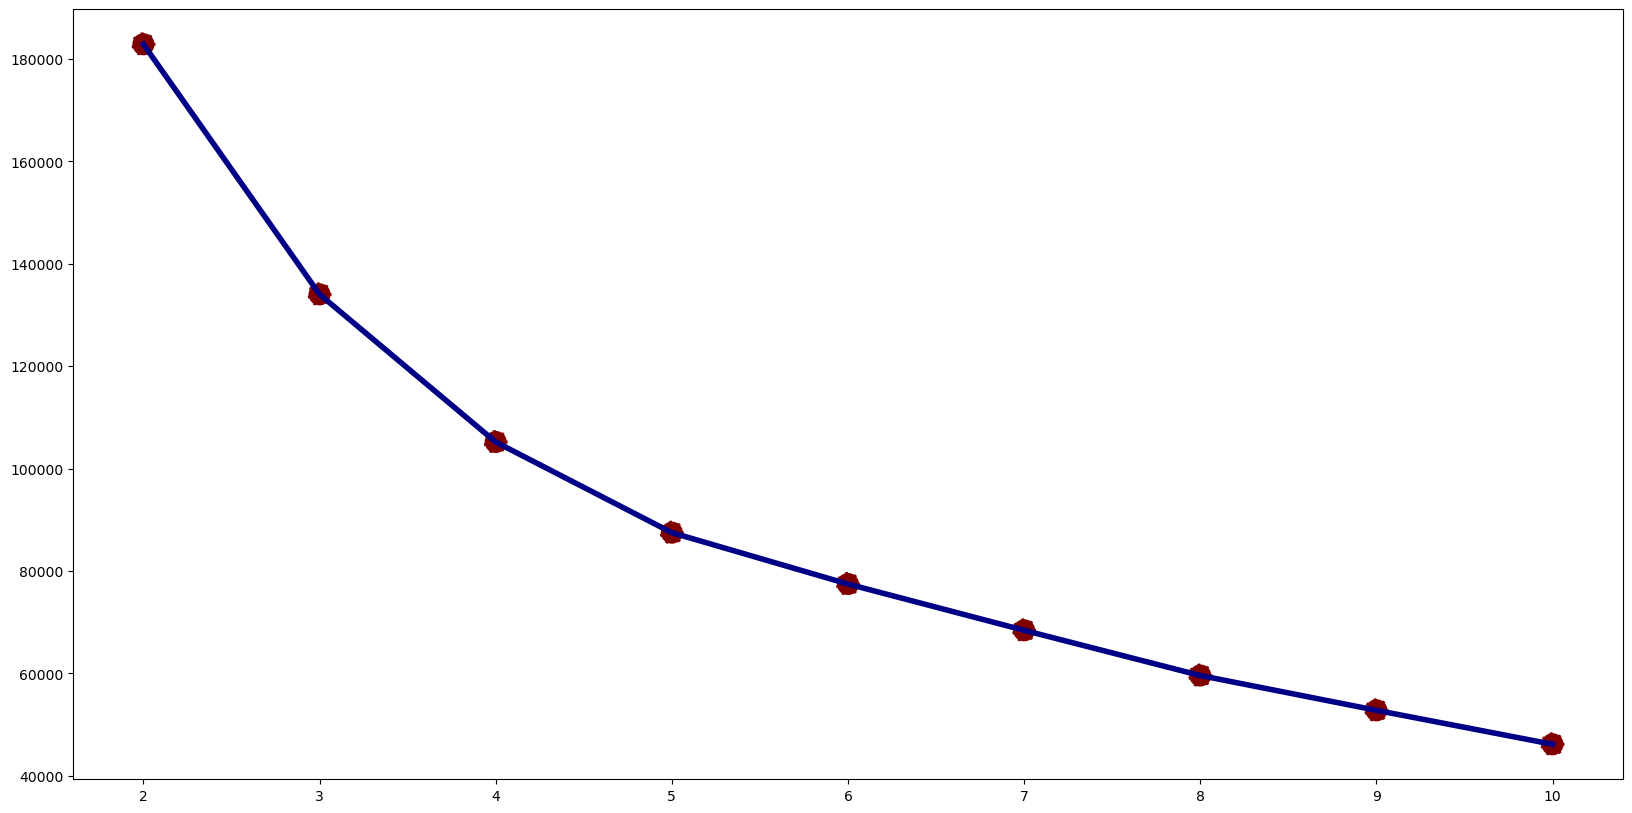

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []

# Iterating the best K for modeling using Elbow method
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

The elbow isn't quite visible. So, we will move to next method which is Silhouette method

In [71]:
# Iterating the best K for modeling using Silhouette method
arr_silhouette_score_euclidean = []
for i in range(3, 11):
    kmeans = KMeans(n_clusters=i).fit(df_scaled)
    preds = kmeans.predict(df_scaled)
     
    score_euclidean = silhouette_score(df_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(3,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(3,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

As we can see the highest value we could get is when we cluster the data into 5 categories. So we will set the value of K = 5

In [72]:
# Fit the model using K = 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df_scaled)
clusters = kmeans.labels_
rfm_clean["KMeans_Segment"] = clusters
rfm_clean

,Recency,Frequency,Monetary,KMeans_Segment
0,112,1,141.90,0
1,115,1,27.19,2
2,537,1,86.22,6
3,321,1,43.62,3
4,288,1,196.89,0
...,...,...,...,...
91459,255,1,73.16,3
91461,262,1,84.58,3
91462,568,1,112.46,6
91463,119,1,133.69,0


In [73]:
kmeans.cluster_centers_

array([[-0.54964811, -0.26176908,  0.70857766],
       [ 0.27206941,  0.15114415,  2.31460849],
       [-0.99963865, -0.25404307, -0.6032432 ],
       [ 0.17030536, -0.26111335, -0.6113236 ],
       [ 0.19119354, 11.58577093,  0.61189905],
       [-0.10946427,  2.05565572,  0.67694126],
       [ 1.47731662, -0.20892643, -0.28158726]])

Next we will visualize the cluster so we could have a better picture of what kind of customer that we have.

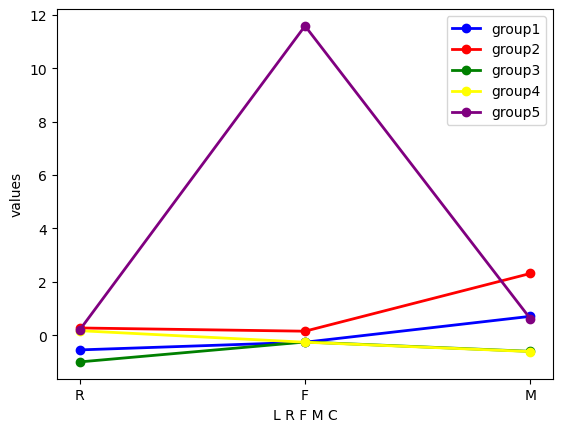

In [74]:
# Visualization using lineplot
x=['R', 'F', 'M']
colors=['blue','red','green','yellow','purple']
for i in range(0,5):
    plt.plot(x,kmeans.cluster_centers_[i],label=('group%d'%(i+1)),linewidth=2,color=colors[i],marker='o')
    plt.legend()
plt.xlabel('L R F M C')
plt.ylabel('values')
plt.show()

The result of clustering using K-means clustering is quite bad compared with RFM analysis. I decided to use the clustering from RFM analysis instead.

### Classification Prediction

In this section, I'll try to create a model that can predict the category of customer based on the clustering that we did in previous RFM analysis. There are several steps which are feature engineering, preprocessing categorical variable, handling imbalance target, and create a model.

#### Feature Engineering

First we need to do some feature engineering. Feature engineering is a process where we add or drop some features that we need / don't need. By using some logical thinking. I'll keep several features which in my opinion related to clustering of the customer which are: 
* customer_city,
* review_score,
* seller_id,
* price,
* freight_value,
* product_category_name,
* payment_type,
* payment_value

I also will add two features which are actual time delivery and estimated time delivery.

In [75]:
df_modelling =merged_df.copy()
### Calculate real delivery time
df_modelling['actual_deliv_time'] = df_modelling['order_delivered_customer_date'] - df_modelling['order_purchase_timestamp']
### Calculate estimated delivery time
df_modelling['est_deliv_time'] = df_modelling['order_estimated_delivery_date'] - df_modelling['order_purchase_timestamp']
df_modelling = df_modelling.merge(rfm_df, on = 'customer_unique_id')
### Select the features that will be used in modelling
df_modelling = df_modelling[['customer_city','actual_deliv_time','est_deliv_time','review_score',
                             'price','freight_value','product_category_name','payment_type',
                             'payment_value','Segment']]
### Convert the date into total seconds
df_modelling['actual_deliv_second'] = df_modelling['actual_deliv_time'].apply(lambda x: x.total_seconds())
df_modelling['est_deliv_second'] = df_modelling['est_deliv_time'].apply(lambda x: x.total_seconds())
### Drop the original date columns
df_modelling.drop(columns=['actual_deliv_time','est_deliv_time'], inplace=True)

#### Preprocessing categorical variables

In [77]:
### Create a function that calculate unique value in each categorical columns
def unique_count(column):
    print(column,'unique value(s):',df_modelling[column].nunique()) 

In [78]:
cats = ['customer_city','product_category_name','payment_type']
for i in cats:
    unique_count(i)

customer_city unique value(s): 4071
product_category_name unique value(s): 71
payment_type unique value(s): 4


There are 4 columns with categorical variables which are customer_city, product_category_name, payment_type, and Segment. customer_city and product_category_name have a lot of unique value which are around 4071 and 71 values. This values is quite big to be handled using one hot encoding so instead we will use frequency encoding. For payment_type we will use one hot encoding, and for Segment we will use ordinal encoding

##### Frequency encoding

In [79]:
### Frequency encoding for customer_city
freq = df_modelling['customer_city'].value_counts().reset_index()
freq['freq'] = round((freq['customer_city']/freq['customer_city'].sum())*100,2)
freq.drop(columns='customer_city', inplace=True)
freq.rename(columns={'index':'customer_city'},inplace=True)
df_modelling = df_modelling.merge(freq, on='customer_city', how='inner')
df_modelling.drop(columns='customer_city', inplace=True)
df_modelling.rename(columns={'freq':'customer_city'}, inplace=True)

In [80]:
### Frequency encoding for product_category_name
freq = df_modelling['product_category_name'].value_counts().reset_index()
freq['freq'] = round((freq['product_category_name']/freq['product_category_name'].sum())*100,2)
freq.drop(columns='product_category_name', inplace=True)
freq.rename(columns={'index':'product_category_name'},inplace=True)
df_modelling = df_modelling.merge(freq, on='product_category_name', how='inner')
df_modelling.drop(columns='product_category_name', inplace=True)
df_modelling.rename(columns={'freq':'product_category_name'}, inplace=True)

##### One hot encoding

In [81]:
df_modelling = pd.get_dummies(df_modelling, drop_first=True, columns=['payment_type'])
df_modelling.head()

,review_score,price,freight_value,payment_value,Segment,actual_deliv_second,est_deliv_second,customer_city,product_category_name,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,4,124.99,21.88,146.87,inactive,761400.0,1673665.0,0.19,1.54,1,0,0
1,3,149.99,32.05,518.39,loyal_customers,553547.0,2885954.0,0.19,1.54,0,0,0
2,3,119.99,28.05,518.39,loyal_customers,553547.0,2885954.0,0.19,1.54,0,0,0
3,1,89.98,27.71,117.69,new_customers,2665032.0,2519665.0,0.19,1.54,0,0,0
4,5,209.99,36.98,246.97,inactive,1308874.0,2116267.0,0.19,1.54,1,0,0


In [198]:
#### Label Encoding target
df_modelling.Segment.unique()
df_modelling['Segment'] = df_modelling['Segment'].map({'inactive':0,
                             'at_Risk':1,
                             'new_customers':2,
                             'loyal_customers':3,
                             'champions':4
                            })
df_modelling

,review_score,price,freight_value,payment_value,Segment,actual_deliv_second,est_deliv_second,customer_city,product_category_name,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,4,124.99,21.88,146.87,NaN,761400.0,1673665.0,0.19,1.54,1,0,0
1,3,149.99,32.05,518.39,NaN,553547.0,2885954.0,0.19,1.54,0,0,0
2,3,119.99,28.05,518.39,NaN,553547.0,2885954.0,0.19,1.54,0,0,0
3,1,89.98,27.71,117.69,NaN,2665032.0,2519665.0,0.19,1.54,0,0,0
4,5,209.99,36.98,246.97,NaN,1308874.0,2116267.0,0.19,1.54,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113188,5,45.00,16.11,61.11,NaN,891759.0,3069895.0,0.11,0.01,1,0,0
113189,4,45.00,16.11,122.22,NaN,1066019.0,2817791.0,0.00,0.01,0,0,0
113190,4,45.00,16.11,122.22,NaN,1066019.0,2817791.0,0.00,0.01,0,0,0
113191,1,100.00,15.45,115.45,NaN,955372.0,2012897.0,2.10,0.00,0,0,0


#### Handling imbalance target

In [84]:
df_modelling['Segment'].value_counts()

2    46944
0    30786
1    14536
3    14114
4     6813
Name: Segment, dtype: int64

As we can see the target is imbalance and therefore we need to balance it first so the prediction doesn't skew into the target that has the higher count values. To handle this we will use SMOTE Oversampling method

In [85]:
### Split the data between features and target
X = df_modelling.drop(columns='Segment')
y = df_modelling['Segment']

In [86]:
### Split the data into train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)

In [87]:
from imblearn import over_sampling
# Overampling with smote
X_over, y_over = over_sampling.SMOTE().fit_resample(X_train, y_train)

### Modelling

#### Logistic Regression

##### Split train test data

In [88]:
### Split the data into train-test data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_over,y_over,test_size=.2,random_state=42,shuffle=True)

In [89]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_lr)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,review_score,1.100866
2,price,1.803601
3,freight_value,1.333390
4,payment_value,1.753033
5,actual_deliv_second,1.290882
6,est_deliv_second,1.277961
7,customer_city,1.105231
8,product_category_name,1.012759
9,payment_type_credit_card,1.117837
10,payment_type_debit_card,1.017755


As we can see the vif_score is quite low. It means the multicollinearity is low among each features. It means we can go into the next step which is Model Training.

##### Model Training

In [90]:
### Model training
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, multi_class='multinomial')
lr.fit(X_train_lr,y_train_lr)

LogisticRegression(multi_class='multinomial', random_state=42)

In [91]:
y_pred_train = lr.predict(X_train_lr)
y_pred       = lr.predict(X_test)

Because the target is imbalance. Then we can't use accuracy as the metric. We want to minimize false positive and false negative rate because we don't want to incorrectly predict the customer category so we will use recall, precision, and f1-score as our metric.

In [92]:
print("Precision using logistic regression on train Data  : {:.2f} %".format(np.round(precision_score(y_train_lr,y_pred_train, average='macro'),4)*100))
print("Recall using logistic regression on train Data  : {:.2f} %".format(np.round(recall_score(y_train_lr,y_pred_train, average='macro'),4)*100))
print("f1 score using logistic regression on train Data  : {:.2f} %".format(np.round(f1_score(y_train_lr, y_pred_train, average='macro'),4)*100))
print("Precision using logistic regression on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred, average='macro'),4)*100))
print("Recall using logistic regression on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred, average='macro'),4)*100))
print("f1 score using logistic regression on test Data  : {:.2f} %".format(np.round(f1_score(y_test, y_pred, average='macro'),4)*100))

Precision using logistic regression on train Data  : 14.43 %
Recall using logistic regression on train Data  : 24.10 %
f1 score using logistic regression on train Data  : 18.05 %
Precision using logistic regression on test Data  : 7.19 %
Recall using logistic regression on test Data  : 24.06 %
f1 score using logistic regression on test Data  : 10.84 %


#### Decision Tree

In [93]:
### Split train test data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_over,y_over,test_size=.2,random_state=42,shuffle=True)

In [94]:
# Define Random Forest Model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

##### Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth':(1,2,3,4,5,6,7,8,9,10),
    'max_leaf_nodes' : (5,10,20,50,100)
}

# note: we use recall
dt_randomcv = RandomizedSearchCV(dt, parameters, cv=5, n_iter=10)
dt_randomcv.fit(X_train_dt, y_train_dt)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'max_leaf_nodes': (5, 10, 20, 50, 100)})

In [96]:
# the results
cv_result = pd.DataFrame(dt_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'max_leaf_nodes': 20, 'max_depth': 7}",0.386944,1
5,"{'max_leaf_nodes': 20, 'max_depth': 10}",0.386944,1
8,"{'max_leaf_nodes': 20, 'max_depth': 9}",0.386944,1
1,"{'max_leaf_nodes': 10, 'max_depth': 9}",0.351887,4
3,"{'max_leaf_nodes': 20, 'max_depth': 4}",0.335342,5
4,"{'max_leaf_nodes': 50, 'max_depth': 4}",0.335342,5
9,"{'max_leaf_nodes': 100, 'max_depth': 4}",0.335342,5
6,"{'max_leaf_nodes': 5, 'max_depth': 4}",0.308434,8
7,"{'max_leaf_nodes': 5, 'max_depth': 8}",0.308434,8
2,"{'max_leaf_nodes': 20, 'max_depth': 2}",0.264475,10


The best hyperparameter are leaf nodes: 100 and max depth: 8

In [97]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=100)
dt.fit(X_train_dt, y_train_dt)
y_pred_train = dt.predict(X_train_dt)
y_pred = dt.predict(X_test)

In [98]:
print("Precision using logistic regression on train Data  : {:.2f} %".format(np.round(precision_score(y_train_dt,y_pred_train, average='macro'),4)*100))
print("Recall using logistic regression on train Data  : {:.2f} %".format(np.round(recall_score(y_train_dt,y_pred_train, average='macro'),4)*100))
print("f1 score using logistic regression on train Data  : {:.2f} %".format(np.round(f1_score(y_train_dt, y_pred_train, average='macro'),4)*100))
print("Precision using logistic regression on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred, average='macro'),4)*100))
print("Recall using logistic regression on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred, average='macro'),4)*100))
print("f1 score using logistic regression on test Data  : {:.2f} %".format(np.round(f1_score(y_test, y_pred, average='macro'),4)*100))

Precision using logistic regression on train Data  : 45.79 %
Recall using logistic regression on train Data  : 45.32 %
f1 score using logistic regression on train Data  : 43.92 %
Precision using logistic regression on test Data  : 42.67 %
Recall using logistic regression on test Data  : 44.21 %
f1 score using logistic regression on test Data  : 40.26 %


#### Random Forest Classifier

In [99]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [100]:
# Define Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

##### Hyperparameter tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50,60,70,80,90,100),
    'max_depth': (1,2,3,4,5,6,7,8,9,10)
}

# note: we use recall
rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, n_iter=10)
rf_clf_randomcv.fit(X_train_rf, y_train_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'n_estimators': (10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100)})

In [102]:
# the results
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
8,"{'n_estimators': 90, 'max_depth': 10}",0.559398,1
9,"{'n_estimators': 70, 'max_depth': 9}",0.533089,2
0,"{'n_estimators': 50, 'max_depth': 8}",0.503020,3
3,"{'n_estimators': 20, 'max_depth': 8}",0.498097,4
7,"{'n_estimators': 100, 'max_depth': 7}",0.476631,5
5,"{'n_estimators': 70, 'max_depth': 4}",0.410467,6
6,"{'n_estimators': 90, 'max_depth': 3}",0.373340,7
4,"{'n_estimators': 50, 'max_depth': 1}",0.324865,8
2,"{'n_estimators': 40, 'max_depth': 1}",0.324566,9
1,"{'n_estimators': 10, 'max_depth': 2}",0.318213,10


The best hyperparameter are number opf trees: 80 and max depth: 9

In [103]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=80, max_depth=9)
rf_clf.fit(X_train_rf, y_train_rf)
y_pred_train = rf_clf.predict(X_train_rf)
y_pred = rf_clf.predict(X_test)

In [104]:
print("Precision using logistic regression on train Data  : {:.2f} %".format(np.round(precision_score(y_train_rf,y_pred_train, average='macro'),4)*100))
print("Recall using logistic regression on train Data  : {:.2f} %".format(np.round(recall_score(y_train_rf,y_pred_train, average='macro'),4)*100))
print("f1 score using logistic regression on train Data  : {:.2f} %".format(np.round(f1_score(y_train_rf, y_pred_train, average='macro'),4)*100))
print("Precision using logistic regression on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred, average='macro'),4)*100))
print("Recall using logistic regression on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred, average='macro'),4)*100))
print("f1 score using logistic regression on test Data  : {:.2f} %".format(np.round(f1_score(y_test, y_pred, average='macro'),4)*100))

Precision using logistic regression on train Data  : 56.05 %
Recall using logistic regression on train Data  : 54.78 %
f1 score using logistic regression on train Data  : 54.22 %
Precision using logistic regression on test Data  : 49.99 %
Recall using logistic regression on test Data  : 49.53 %
f1 score using logistic regression on test Data  : 47.93 %


#### K-nearest neighbour

In [105]:
### Split train test data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [106]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [107]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_rcv = RandomizedSearchCV(knn_clf, parameters, cv=5)
knn_clf_rcv.fit(X_train_knn, y_train_knn)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                                        'weights': ('uniform', 'distance')})

In [108]:
# the compact results
cv_result = pd.DataFrame(knn_clf_rcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'weights': 'distance', 'n_neighbors': 2}",0.663666,1
7,"{'weights': 'distance', 'n_neighbors': 5}",0.654526,2
2,"{'weights': 'distance', 'n_neighbors': 6}",0.651519,3
1,"{'weights': 'distance', 'n_neighbors': 7}",0.648506,4
9,"{'weights': 'distance', 'n_neighbors': 8}",0.645991,5
8,"{'weights': 'uniform', 'n_neighbors': 3}",0.625928,6
6,"{'weights': 'uniform', 'n_neighbors': 2}",0.624092,7
5,"{'weights': 'uniform', 'n_neighbors': 4}",0.611818,8
0,"{'weights': 'uniform', 'n_neighbors': 5}",0.599838,9
4,"{'weights': 'uniform', 'n_neighbors': 7}",0.578949,10


In [109]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=2)
knn_clf.fit(X_train_knn, y_train_knn)
y_pred_train = knn_clf.predict(X_train_knn)
y_pred = knn_clf.predict(X_test)

In [110]:
print("Precision using logistic regression on train Data  : {:.2f} %".format(np.round(precision_score(y_train_knn,y_pred_train, average='macro'),4)*100))
print("Recall using logistic regression on train Data  : {:.2f} %".format(np.round(recall_score(y_train_knn,y_pred_train, average='macro'),4)*100))
print("f1 score using logistic regression on train Data  : {:.2f} %".format(np.round(f1_score(y_train_knn, y_pred_train, average='macro'),4)*100))
print("Precision using logistic regression on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred, average='macro'),4)*100))
print("Recall using logistic regression on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred, average='macro'),4)*100))
print("f1 score using logistic regression on test Data  : {:.2f} %".format(np.round(f1_score(y_test, y_pred, average='macro'),4)*100))

Precision using logistic regression on train Data  : 100.00 %
Recall using logistic regression on train Data  : 100.00 %
f1 score using logistic regression on train Data  : 100.00 %
Precision using logistic regression on test Data  : 47.63 %
Recall using logistic regression on test Data  : 59.69 %
f1 score using logistic regression on test Data  : 51.05 %


#### XGBoost

In [111]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [112]:
# Import classifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

##### Hyperparameter Tuning

In [113]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth': (6,7,8,9,10,20,30),
    'gamma': (0,1,2,3,4,5,10)
}

# now we use recall (sensitivity) as metric
xgb_clf_rcv = RandomizedSearchCV(xgb_clf, parameters, cv=5)
xgb_clf_rcv.fit(X_train_knn, y_train_knn)

In [114]:
# the compact results
cv_result = pd.DataFrame(xgb_clf_rcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

In [115]:
xgb_clf = xgb.XGBClassifier(max_depth=30, gamma=2, objective= 'multi:softprob', reg_alpha=0.1, 
                            reg_lambda=0.1, 
                            subsample=0.8, 
                            colsample_bytree=0.8,
                            eval_metric='aucpr')
xgb_clf.fit(X_train_xgb, y_train_xgb)
y_pred_train = xgb_clf.predict(X_train_xgb)
y_pred = xgb_clf.predict(X_test)

In [116]:
print("Precision using logistic regression on train Data  : {:.2f} %".format(np.round(precision_score(y_train_xgb,y_pred_train, average='macro'),4)*100))
print("Recall using logistic regression on train Data  : {:.2f} %".format(np.round(recall_score(y_train_xgb,y_pred_train, average='macro'),4)*100))
print("f1 score using logistic regression on train Data  : {:.2f} %".format(np.round(f1_score(y_train_xgb, y_pred_train, average='macro'),4)*100))
print("Precision using logistic regression on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred, average='macro'),4)*100))
print("Recall using logistic regression on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred, average='macro'),4)*100))
print("f1 score using logistic regression on test Data  : {:.2f} %".format(np.round(f1_score(y_test, y_pred, average='macro'),4)*100))

Precision using logistic regression on train Data  : 98.55 %
Recall using logistic regression on train Data  : 98.52 %
f1 score using logistic regression on train Data  : 98.52 %
Precision using logistic regression on test Data  : 78.71 %
Recall using logistic regression on test Data  : 73.52 %
f1 score using logistic regression on test Data  : 75.82 %


#### Potential Impact on Business

The best model to predict the classification of customers is XGBoost with f1 score of 75.56%. If we use this model, we can correctly predict customer category therefore we could make a correct approach which we have covered in previous section in RFM analysis based on this model's prediction. For example, Let's assume the cost to advertise to one customer is 10 dollars. From 1000 customers who become inactive, we can predict around 75 percent of them correctly which means the company could save around 750 dollars of cost. This 750 dollars could be used to focus on other categories that need prioritized more. 

## Conclusion & Recommendation

* 80% of the sales contributed by only 6 states of 27 states. Those 6 states are: 
    1. SP (Sao Paulo), 
    2. RJ (Rio de Janeiro), 
    3. MG (Minas Gerais), 
    4. RS (Rio Grande do Sul), 
    5. PR (Paraná),  
    6. SC (Santa Catarina).
    
  The marketing team can focus their effort more in these states.
* Across 71 products, 50% of the sales could be covered by only 7 products. Those 7 products are: 
    1. Bed Bath Table, 
    2. Health Beauty, 
    3. Sports Leisure, 
    4. Furniture Decor, 
    5. Computers Accessories, 
    6. Housewares, 
    7. Watches_gifts.
    
  Based on this insight the company can focus more on producing this type of products and the marketing team can market these products more
* Paraiba has the highest average spending value, Sao Paulo on the other hand lies on the other end of the same spectrum.
* the most sold furnitures across each state are bed bath table, furniture decor, health beauty, and sports leisure. Bed bath table dominate the sales on top 5 states which are SP, RJ, MG, RS, and PR. The company can focus the item's stock of those 5 states with bed bath table.
* There are several times that has the highest order activity record. In terms of hours, the peak hours are around 10 AM - 3 PM and around 8 PM. In terms of day of the week, the order activity is declining from the highest peak which is monday all the way down until saturday which is the lowest activity recorded. In terms of days, There are several peaks which is around 5th, 15th, and 25th of the month. The marketing team can focus their campaign or advertisment on these day/time.
* The actual delivery time mostly faster than the estimated delivery time meaning the logistic partner did a good job.
* Based on RFM Analysis, the customer can be clustered into 5 categories which are:
    * New customer: customers who recently made a purchase but the frequency is still quite low. We can target them with discount/promo to make them engaged with us,
    * Inactive: customers who haven't made a purchase in a long time and are considered inactive, we could send them a survey or personalized email to ask them if they disastified with our service so we could get them back,
    * at Risk: customers who are at risk of becoming inactive or churning. We can treat them the same like inactive customers while also give them some promo to keep them engaged with us.
    * Loyal customer: customers who has high recency and high frequency means they are frequently visiting our store and least likely to go to our rival. We could offer them some personalized recommendation and gives them some kind of membership to encourage them to buy more product so they can level up their membership status.
    * Champion: our loyal customer who spend most money in our store. Treat them with our biggest services!!
    
* The best model to predict customer's category is using XGBoost which could correctly predict 75% of customer category. This model could help us to correctly gives each customer their respective treatment which means we could increase profit and minimize losses. For example, Let's assume the cost to advertise to one customer is 10 dollars. From 1000 customers who become inactive, we can predict around 75 percent of them correctly which means the company could save around 750 dollars of cost. This 750 dollars could be used to focus on other categories that need prioritized more. 